Santiago Quiroz Upegui cc: 1036678350. Grupo 1

SIMULACIÓN DE SISTEMAS - 3007331

PRÁCTICA # 4 



In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# problema 2: Almacen de repuestos Autotool

El almacén de repuestos Autotool tiene la capacidad de atender un cliente a la vez. El

administrador del almacén lo contrata a usted para analizar por medio de simulación la

llegada de 50 clientes al almacén a partir de la siguiente información:

• El tiempo entre llegadas de clientes se distribuye como una variable aleatoria con

función de densidad de probabilidad f(x)=4x*x-10, 2≤x≤3.

 Simule este tiempo entre llegadas usando el método de aceptación- rechazo para generar variables aleatorias.

• El tiempo de servicio en el almacén en minutos se distribuye de la siguiente manera:

## encontrando el valor maximo de la fdp
f'(x) = 8x

si 8x = 0

x = 0 ... pero x no pertenece al dominio dado 2≤x≤3

evaluemos en los extremos del intervalo

f(2) =  16 - 10 = 6,
f(3) = 36 - 10 = 26

el valor maximo M de la fdp es 26

## segun el metodo de aceptacion -  rechazo: 

g(x) =  (f(x)/M) = ((4*x*x) - 10)/26 , con g(x) < 1

### si genero 2 aleatorios (r1 , r2) y se cumple lo siguiente:

sea x = a + (b - a)r1 = 2 + (3 - 1) r1

si r2 <= g(x)

### x es una variable aleatoria valida para usar en nuestra simulacion

### asi que solo hay que repetir la generacion de aleatorios con hasta que se cumpla la condicion

## Definimos una funcion para generar la variable aleatoria por medio de aceptacion - rechazo 

In [2]:
def genAleatorioAceptacionRechazo(f,M,a,b):
    while True :
        r1 = random.uniform(0, 1)
        r2 = random.uniform(0, 1)
        x = a + (b - a) * r1
        g = (f(x)/M)
        if r2 <= g:
            return x 


In [3]:
f = lambda x :  (4*(x**2))-10
## print(genAleatorioAceptacionRechazo(f,26,2,3))

## Definimos una funcion para generar la variable aleatoria para el tiempo de servicio del almacen segun los datos dados


In [4]:
def genTiempoServicio():
    r = random.uniform(0,1)
    if 0 <= r <= 0.2:
        return random.uniform(1,2)
    elif 0.2 < r <= 0.55:
        while True:
            x = random.uniform(2,3)
            if x > 2.0 :
                return x
    elif 0.55 < r <= 0.85:
        while True:
            x = random.uniform(3,4)
            if x > 3.0 :
                return x
    elif 0.85 < r <= 1.0:
        while True:
            x = random.uniform(4,5)
            if x > 4.0 :
                return x


## Ahora modelamos el problema de cola

como el problema de cola tiene la misma estructura en los 2 casos, lo definire como una funcion para su uso futuro

In [5]:
def problemaCola(genTiempoEntreLlegada,genTiempoServicio,n):
    #definimos los datos de la simulacion:
    #datosSimulacion matriz que contiene en cada fila [Tiempo entre llegadas, Tiempo de servicio Tiempo de llegada, Tiempo en fila, Tiempo de finalizacion del servicio, Tiempo total en el sistema]
    datosSimulacion = []

    # como el primero en llegar a la cola no tiene que esperar no tiene que esperar en la fila y el tiempo de llegada es el mismo al tiempo entre llegadas generado aleatoriamente
    TiempoEntreLLegadas = genTiempoEntreLlegada()
    TiempoServicio = genTiempoServicio()
    TiempoLLegada = TiempoEntreLLegadas
    TiempoEnFila = 0
    TiempoFinalizacionServicio = TiempoLLegada + TiempoServicio + TiempoEnFila
    TiempoTotalSistema = TiempoFinalizacionServicio - TiempoLLegada

    datosSimulacion.append([TiempoEntreLLegadas, TiempoServicio, TiempoLLegada, TiempoEnFila, TiempoFinalizacionServicio, TiempoTotalSistema])

    # con los otros restantes si es diferente
    
    for i in range(1,n):
        TiempoLLegadaAnterior = datosSimulacion[i-1][2]
        TiempoFinalizacionServicioAnterior = datosSimulacion[i-1][4]
        TiempoEntreLLegadas = genTiempoEntreLlegada()
        TiempoServicio = genTiempoServicio()
        TiempoLLegada = TiempoEntreLLegadas + TiempoLLegadaAnterior
        TiempoEnFila = 0
        espera = TiempoLLegada - TiempoFinalizacionServicioAnterior
        if espera <= 0:
            TiempoEnFila = abs(espera)
        TiempoFinalizacionServicio = TiempoLLegada + TiempoServicio + TiempoEnFila
        TiempoTotalSistema = TiempoFinalizacionServicio - TiempoLLegada

        datosSimulacion.append([TiempoEntreLLegadas, TiempoServicio, TiempoLLegada, TiempoEnFila, TiempoFinalizacionServicio, TiempoTotalSistema])

    return datosSimulacion

## Simulamos con 50 clientes

In [6]:
n=50
def genTiempoEntreLlegada():
     return genAleatorioAceptacionRechazo(f,26,2,3)
datosSimulacion = problemaCola(genTiempoEntreLlegada,genTiempoServicio,n)

## definimos una funcion para calcular un intervalo de confianza para una media poblacional

In [7]:
#funcion que calcula los estimadores necesarios para el intervalo de confianza de la media y retorna una tupla (media, desviacion)
def calcularEstimadores(datos):
    media = np.mean(datos,axis=0)
    desviacionEstandar = np.std(datos,axis=0)
    return (media, desviacionEstandar)

def calcularIntervaloConfianzaMedia(media, desviacionEstandar, numeroSimulaciones):
    #calculando el intervalo de confianza
    t_tabla= t.ppf(1-(alfa/2),(numeroSimulaciones-1))
    print("valor t con grados de libertad α/2 y n-1 ", t_tabla)
    derecha =media+(t_tabla)*(desviacionEstandar/(numeroSimulaciones**1/2))
    izquierda = media-(t_tabla)*(desviacionEstandar/(numeroSimulaciones**1/2))
    return (izquierda,derecha)

## calculamos los estimadores para los datos

In [8]:
medias , desviaciones = calcularEstimadores(datosSimulacion) 

In [9]:
alfa = 0.05

## a. el tiempo promedio en el sistema de los clientes. 

In [10]:
print("El tiempo promedio en el sistema de la muestra fue de: ", medias[5] )

# calculamos el intervalo de confianza para este
intervaloMediaTiempoTotalSistema = calcularIntervaloConfianzaMedia(medias[5], desviaciones[5], n)

print("Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en el sistema es: ")
print(intervaloMediaTiempoTotalSistema)

El tiempo promedio en el sistema de la muestra fue de:  13.521854544913232
valor t con grados de libertad α/2 y n-1  2.009575234489209
Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en el sistema es: 
(13.113352149772625, 13.930356940053839)


## b. el tiempo promedio en la taquilla de los usuarios. 

In [11]:
print("El tiempo promedio en la taquilla de la muestra fue de: ", medias[1] )

# calculamos el intervalo de confianza para este
intervaloMediaTiempoServicio = calcularIntervaloConfianzaMedia(medias[1], desviaciones[1], n)

print("Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en el servicio de taquilla es: ")
print(intervaloMediaTiempoServicio)

El tiempo promedio en la taquilla de la muestra fue de:  2.956450323906919
valor t con grados de libertad α/2 y n-1  2.009575234489209
Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en el servicio de taquilla es: 
(2.8769971375069097, 3.035903510306928)


## c. el tiempo promedio de espera de los usuarios. 

In [12]:
print("El tiempo promedio de espera de clientes de la muestra fue de: ", medias[3] )

# calculamos el intervalo de confianza para este
intervaloMediaTiempoEnFila = calcularIntervaloConfianzaMedia(medias[3], desviaciones[3], n)

print("Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en espera en la fila es: ")
print(intervaloMediaTiempoEnFila)

El tiempo promedio de espera de clientes de la muestra fue de:  10.565404221006315
valor t con grados de libertad α/2 y n-1  2.009575234489209
Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en espera en la fila es: 
(10.145885019520769, 10.98492342249186)


## d. un histograma del tiempo de espera de los usuarios. Analícelo. 

calculando el numero k de intervalos(clases):
k=roundup(log2(n)+1)

este es el k de las clases  7


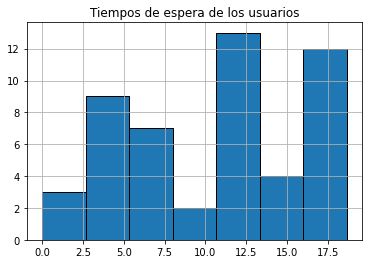

<Figure size 432x288 with 0 Axes>

In [13]:
k = math.ceil(math.log2(n) + 1)

tiemposEnFilaClientes = []

for i in range (0,len(datosSimulacion)) :
    tiemposEnFilaClientes.append(datosSimulacion[i][3])

print("este es el k de las clases ", k)
plt.title('Tiempos de espera de los usuarios')
plt.hist(tiemposEnFilaClientes, bins=k, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()